In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('lasvegas.csv')

In [3]:
df.head()

,LVR,REF,INSUR,RATE,AMOUNT,CREDIT,TERM,ARM,DELINQUENT
0,80.0,0,1,6.355,1.5760,532,30,1,0
1,89.0,1,1,6.875,3.1595,703,30,1,0
2,80.0,1,1,7.080,1.7600,648,30,1,0
3,80.0,0,0,12.855,1.9680,599,30,1,1
4,70.0,1,0,5.760,1.8620,626,30,1,0


In [5]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.4, random_state=131)
validation, test = train_test_split(test, test_size=0.5, random_state=211)

In [6]:
train.shape

(600, 9)

In [8]:
X_train = train.drop(['DELINQUENT'], axis=1)
y_train = train['DELINQUENT']
X_val = validation.drop(['DELINQUENT'], axis=1)
y_val = validation['DELINQUENT']
X_test = test.drop(['DELINQUENT'], axis=1)
y_test = test['DELINQUENT']

In [9]:
from sklearn.linear_model import LinearRegression, LogisticRegression

In [10]:
lpm = LinearRegression(fit_intercept=True)
lpm.fit(X_train, y_train)

LinearRegression()

In [11]:
print(lpm.coef_)

[ 1.38659209e-03 -2.51696071e-02 -4.50030578e-01  4.49202362e-02
  2.50468121e-02 -2.07460019e-04 -1.01177169e-02  1.37816335e-01]


<AxesSubplot:ylabel='Frequency'>

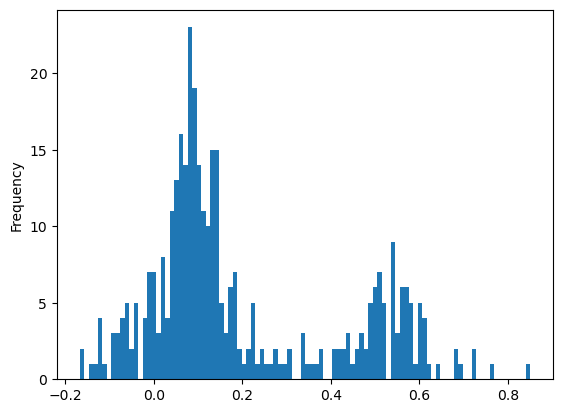

In [12]:
train['lpm_pred_prob_train']=pd.DataFrame(lpm.predict(X_train))
train.lpm_pred_prob_train.plot(kind='hist', bins=100)

In [13]:
from sklearn.metrics import roc_curve, auc, confusion_matrix

In [15]:
result = pd.DataFrame(lpm.predict(X_val), columns=['lpm_pred_prob_val'])
result.head()

,lpm_pred_prob_val
0,0.591952
1,0.001959
2,0.350401
3,0.127891
4,0.093144


<AxesSubplot:ylabel='Frequency'>

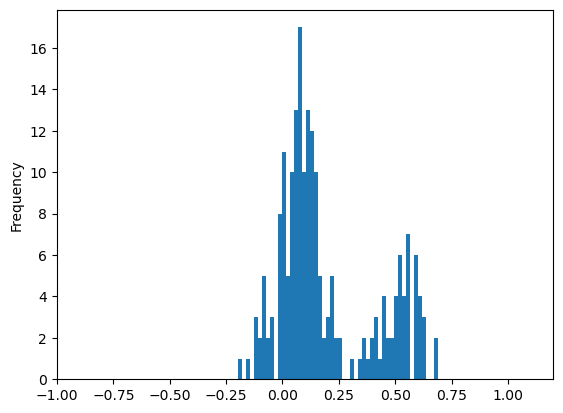

In [18]:
result.lpm_pred_prob_val.plot(kind='hist',bins=50, xlim=([-1,1.2]))

In [19]:
fpr_lpm, tpr_lpm, thresholds_lpm = roc_curve(validation.DELINQUENT, result.lpm_pred_prob_val)
roc_result = pd.DataFrame([fpr_lpm, tpr_lpm, thresholds_lpm], index=['fpr_lpm', 'tpr_lpm', 'thresholds_lpm']).T
roc_result

,fpr_lpm,tpr_lpm,thresholds_lpm
0,0.000000,0.000000,1.691583
1,0.000000,0.024390,0.691583
2,0.000000,0.097561,0.626410
3,0.006289,0.097561,0.625231
4,0.006289,0.146341,0.612529
5,0.012579,0.146341,0.611297
6,0.012579,0.195122,0.601491
7,0.025157,0.195122,0.591952
8,0.025157,0.268293,0.585247
9,0.031447,0.268293,0.566811


In [22]:
roc_result['best']=(1-roc_result['fpr_lpm'])+(roc_result['tpr_lpm'])
roc_result.head(10)

,fpr_lpm,tpr_lpm,thresholds_lpm,best
0,0.000000,0.000000,1.691583,1.000000
1,0.000000,0.024390,0.691583,1.024390
2,0.000000,0.097561,0.626410,1.097561
3,0.006289,0.097561,0.625231,1.091272
4,0.006289,0.146341,0.612529,1.140052
5,0.012579,0.146341,0.611297,1.133763
6,0.012579,0.195122,0.601491,1.182543
7,0.025157,0.195122,0.591952,1.169965
8,0.025157,0.268293,0.585247,1.243135
9,0.031447,0.268293,0.566811,1.236846


In [23]:
optim_threshold_lpm = roc_result.thresholds_lpm[roc_result.best.idxmax()]
optim_threshold_lpm

0.45638774541398913